# Limpieza de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_pickle('df_for_regression_2015_2016.pkl')
df.head()

,jugador,fecha_nacimiento_x,nacionalidad,equipo_x,posicion_1,posicion_2,posicion_3,minutos_jugados_pos1,minutos_jugados_pos2,minutos_jugados_pos3,ranking_pos1,ranking_pos2,ranking_pos3,ranking_restringido_pos1,ranking_restringido_pos2,ranking_restringido_pos3,value_2015,value_2016
0,"Abelairas, Matias",1985-06-18,Argentina,NaN,Volante Mixto,Volante ofensivo,NaN,128.0,128.0,NaN,9.485156,6.644531,NaN,0.000000,0.000000,NaN,NaN,NaN
1,"Abila, Ramon",1989-10-14,Argentina,Club Atlético Huracán,Delantero,Delantero con Movilidad,NaN,2094.0,2094.0,NaN,2.281160,1.449713,NaN,2.281160,1.449713,NaN,0.400,NaN
2,"Acevedo, Lucas",1991-11-08,Argentina,NaN,Defensa central,NaN,NaN,379.0,NaN,NaN,7.387124,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
3,"Acevedo, Nelson",1988-07-11,Argentina,Club Atlético Unión (Santa Fe),Volante defensivo,Volante Mixto,NaN,699.0,699.0,NaN,8.114807,6.786695,NaN,8.114807,6.786695,NaN,0.075,0.225
5,"Acevedo, Walter",1986-02-16,Argentina,NaN,Volante defensivo,Volante Mixto,NaN,538.0,538.0,NaN,8.406134,7.415799,NaN,0.000000,0.000000,NaN,NaN,NaN


Observemos que Acevedo Nelson está repetido dos veces. Podría ser que tuviéramos renglones repetidos en el dataframe. Vamos a revisarlo:

In [5]:
print('El número de renglones es:', df.shape[0])
print('El número de valores únicos en la columna jugador es:', df.jugador.nunique())

El número de renglones es: 965
El número de valores únicos en la columna jugador es: 872


Así que tenemos renglones duplicados de los que hay que deshacernos. Usemos la función drop_duplicates de pandas para lograrlo:

In [6]:
df = df.drop_duplicates()

In [7]:
df.shape[0]

965

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 0 to 1062
Data columns (total 18 columns):
jugador                     965 non-null object
fecha_nacimiento_x          965 non-null datetime64[ns]
nacionalidad                965 non-null object
equipo_x                    635 non-null object
posicion_1                  965 non-null object
posicion_2                  643 non-null object
posicion_3                  14 non-null object
minutos_jugados_pos1        965 non-null float64
minutos_jugados_pos2        643 non-null float64
minutos_jugados_pos3        14 non-null float64
ranking_pos1                965 non-null float64
ranking_pos2                643 non-null float64
ranking_pos3                14 non-null float64
ranking_restringido_pos1    965 non-null float64
ranking_restringido_pos2    643 non-null float64
ranking_restringido_pos3    14 non-null float64
value_2015                  507 non-null float64
value_2016                  548 non-null float64
dtypes: datetim

Aún tenemos jugadores duplicados, pero estos corresponden a jugadores que cambiaron de equipo durante el periódo de transferencia. Estos renglones difieren únicamente en la columna equipo_x. Dejémoslo así por el momento.

In [19]:
df.columns

Index(['Jugador', 'Fecha_de_Nacimiento', 'Nacionalidad', 'posicion_1',
       'posicion_2', 'posicion_3', 'minutos_jugados_pos1',
       'minutos_jugados_pos2', 'minutos_jugados_pos3', 'ranking_pos1',
       'ranking_pos2', 'ranking_pos3', 'ranking_restringido_pos1',
       'ranking_restringido_pos2', 'ranking_restringido_pos3', 'equipo_x',
       'value_2015', 'value_2016'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 480
Data columns (total 18 columns):
Jugador                     404 non-null object
Fecha_de_Nacimiento         404 non-null datetime64[ns]
Nacionalidad                404 non-null object
posicion_1                  404 non-null object
posicion_2                  266 non-null object
posicion_3                  9 non-null object
minutos_jugados_pos1        404 non-null float64
minutos_jugados_pos2        266 non-null float64
minutos_jugados_pos3        9 non-null float64
ranking_pos1                404 non-null float64
ranking_pos2                266 non-null float64
ranking_pos3                9 non-null float64
ranking_restringido_pos1    404 non-null float64
ranking_restringido_pos2    266 non-null float64
ranking_restringido_pos3    9 non-null float64
equipo_x                    404 non-null object
value_2015                  318 non-null float64
value_2016                  395 non-null float64
dtypes: datetime64[n

Tenemos varios nulos a tratar, pero, primero, algo que nos diría más que la fecha de nacimiento es la edad del jugador. Calculémosla:

In [9]:
import datetime

La funcion age calculator toma la fecha de nacimiento del jugador y calcula su edad al 15 de Enero del 2016.

In [14]:
def age_calculator(df):
    
    ref_date = []
    
    for i in range(0, len(df)):
        birthday = pd.Timestamp('2016-01-15')
        ref_date.append(birthday)
    
    ref_date = pd.to_datetime(ref_date)
    tiempo = ref_date-df['fecha_nacimiento_x']
    edad = tiempo.apply(lambda x: round((x.days)/365,1))
    df['edad'] = edad
    df.drop('fecha_nacimiento_x',1,inplace = True)

Aplicando la función al dataframe:

In [15]:
age_calculator(df)

In [16]:
df.head(2)

,jugador,nacionalidad,equipo_x,posicion_1,posicion_2,posicion_3,minutos_jugados_pos1,minutos_jugados_pos2,minutos_jugados_pos3,ranking_pos1,ranking_pos2,ranking_pos3,ranking_restringido_pos1,ranking_restringido_pos2,ranking_restringido_pos3,value_2015,value_2016,edad
0,"Abelairas, Matias",Argentina,NaN,Volante Mixto,Volante ofensivo,NaN,128.0,128.0,NaN,9.485156,6.644531,NaN,0.00000,0.000000,NaN,NaN,NaN,30.6
1,"Abila, Ramon",Argentina,Club Atlético Huracán,Delantero,Delantero con Movilidad,NaN,2094.0,2094.0,NaN,2.281160,1.449713,NaN,2.28116,1.449713,NaN,0.4,NaN,26.3


## Tratamiento de Valores Nulos

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 0 to 1062
Data columns (total 18 columns):
jugador                     965 non-null object
nacionalidad                965 non-null object
equipo_x                    635 non-null object
posicion_1                  965 non-null object
posicion_2                  643 non-null object
posicion_3                  14 non-null object
minutos_jugados_pos1        965 non-null float64
minutos_jugados_pos2        643 non-null float64
minutos_jugados_pos3        14 non-null float64
ranking_pos1                965 non-null float64
ranking_pos2                643 non-null float64
ranking_pos3                14 non-null float64
ranking_restringido_pos1    965 non-null float64
ranking_restringido_pos2    643 non-null float64
ranking_restringido_pos3    14 non-null float64
value_2015                  507 non-null float64
value_2016                  548 non-null float64
edad                        965 non-null float64
dtypes: float64(12), o

Dado que vamos a crear la variable total_minutos_jugados, nos conviene rellenar los valores nulos de minutos_jugados_pos2 y minutos_jugados_pos3 con ceros:

In [18]:
df['minutos_jugados_pos2'] = df.minutos_jugados_pos2.fillna(0)

In [19]:
df['minutos_jugados_pos3'] = df.minutos_jugados_pos3.fillna(0)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 0 to 1062
Data columns (total 18 columns):
jugador                     965 non-null object
nacionalidad                965 non-null object
equipo_x                    635 non-null object
posicion_1                  965 non-null object
posicion_2                  643 non-null object
posicion_3                  14 non-null object
minutos_jugados_pos1        965 non-null float64
minutos_jugados_pos2        965 non-null float64
minutos_jugados_pos3        965 non-null float64
ranking_pos1                965 non-null float64
ranking_pos2                643 non-null float64
ranking_pos3                14 non-null float64
ranking_restringido_pos1    965 non-null float64
ranking_restringido_pos2    643 non-null float64
ranking_restringido_pos3    14 non-null float64
value_2015                  507 non-null float64
value_2016                  548 non-null float64
edad                        965 non-null float64
dtypes: float64(12), 

In [21]:
df.posicion_1.unique()

array(['Volante Mixto ', 'Delantero', 'Defensa central',
       'Volante defensivo', 'Volante por izquierda',
       'Volante por derecha', 'Lateral por derecha',
       'Lateral por izquierda'], dtype=object)

En el apartado de posición 1, 2 y 3 tenemos nulos en 2 y 3 y conviene remplazarlos por los strings 'No aplica':

In [22]:
df['posicion_2'] = df.posicion_2.fillna('No aplica')
df['posicion_3'] = df.posicion_3.fillna('No aplica')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 0 to 1062
Data columns (total 18 columns):
jugador                     965 non-null object
nacionalidad                965 non-null object
equipo_x                    635 non-null object
posicion_1                  965 non-null object
posicion_2                  965 non-null object
posicion_3                  965 non-null object
minutos_jugados_pos1        965 non-null float64
minutos_jugados_pos2        965 non-null float64
minutos_jugados_pos3        965 non-null float64
ranking_pos1                965 non-null float64
ranking_pos2                643 non-null float64
ranking_pos3                14 non-null float64
ranking_restringido_pos1    965 non-null float64
ranking_restringido_pos2    643 non-null float64
ranking_restringido_pos3    14 non-null float64
value_2015                  507 non-null float64
value_2016                  548 non-null float64
edad                        965 non-null float64
dtypes: float64(12),

In [24]:
df.ranking_pos1.describe()

count    965.000000
mean       4.952111
std        2.432928
min        0.000000
25%        3.361017
50%        4.532143
75%        6.289396
max       49.500000
Name: ranking_pos1, dtype: float64

In [25]:
df.ranking_pos2.describe()

count    643.000000
mean       4.095810
std        2.070979
min        0.000000
25%        2.304155
50%        4.090909
75%        5.436336
max       14.850000
Name: ranking_pos2, dtype: float64

In [26]:
df[df.ranking_pos2 == 0]

,jugador,nacionalidad,equipo_x,posicion_1,posicion_2,posicion_3,minutos_jugados_pos1,minutos_jugados_pos2,minutos_jugados_pos3,ranking_pos1,ranking_pos2,ranking_pos3,ranking_restringido_pos1,ranking_restringido_pos2,ranking_restringido_pos3,value_2015,value_2016,edad
472,"Gonzalez, Gonzalo",Argentina,Arsenal Fútbol Club,Delantero,Delantero con Movilidad,No aplica,3.0,3.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,21.1
530,"Lattanzio, Carlo",Argentina,NaN,Delantero,Delantero con Movilidad,No aplica,3.0,3.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,18.5
531,"Laurito, Federico",Argentina,Arsenal Fútbol Club,Delantero,Delantero con Movilidad,No aplica,1.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.8,NaN,25.7
968,"Torres, Jonatan",Argentina,NaN,Delantero,Delantero con Movilidad,No aplica,2.0,2.0,0.0,4.5,0.0,NaN,0.0,0.0,NaN,NaN,NaN,19.1


El único jugador con un ranking_pos2 igual a cero es un jugador que sólo jugó dos minutos durante la temporada. Reemplacemos los NAN de ranking_pos2 por ceros: 

In [27]:
df['ranking_pos2'] = df.ranking_pos2.fillna(0)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 0 to 1062
Data columns (total 18 columns):
jugador                     965 non-null object
nacionalidad                965 non-null object
equipo_x                    635 non-null object
posicion_1                  965 non-null object
posicion_2                  965 non-null object
posicion_3                  965 non-null object
minutos_jugados_pos1        965 non-null float64
minutos_jugados_pos2        965 non-null float64
minutos_jugados_pos3        965 non-null float64
ranking_pos1                965 non-null float64
ranking_pos2                965 non-null float64
ranking_pos3                14 non-null float64
ranking_restringido_pos1    965 non-null float64
ranking_restringido_pos2    643 non-null float64
ranking_restringido_pos3    14 non-null float64
value_2015                  507 non-null float64
value_2016                  548 non-null float64
edad                        965 non-null float64
dtypes: float64(12),

In [29]:
df.ranking_pos3.describe()

count    14.000000
mean      4.206852
std       1.487943
min       1.289879
25%       3.498047
50%       4.268204
75%       5.445656
max       6.071831
Name: ranking_pos3, dtype: float64

El mínimo de ranking_pos3 es 3.65, no habría problema de rellenar los datos faltantes con ceros:

In [30]:
df['ranking_pos3'] = df.ranking_pos3.fillna(0)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 0 to 1062
Data columns (total 18 columns):
jugador                     965 non-null object
nacionalidad                965 non-null object
equipo_x                    635 non-null object
posicion_1                  965 non-null object
posicion_2                  965 non-null object
posicion_3                  965 non-null object
minutos_jugados_pos1        965 non-null float64
minutos_jugados_pos2        965 non-null float64
minutos_jugados_pos3        965 non-null float64
ranking_pos1                965 non-null float64
ranking_pos2                965 non-null float64
ranking_pos3                965 non-null float64
ranking_restringido_pos1    965 non-null float64
ranking_restringido_pos2    643 non-null float64
ranking_restringido_pos3    14 non-null float64
value_2015                  507 non-null float64
value_2016                  548 non-null float64
edad                        965 non-null float64
dtypes: float64(12)

In [32]:
df[df.ranking_restringido_pos1 == 0].head()

,jugador,nacionalidad,equipo_x,posicion_1,posicion_2,posicion_3,minutos_jugados_pos1,minutos_jugados_pos2,minutos_jugados_pos3,ranking_pos1,ranking_pos2,ranking_pos3,ranking_restringido_pos1,ranking_restringido_pos2,ranking_restringido_pos3,value_2015,value_2016,edad
0,"Abelairas, Matias",Argentina,NaN,Volante Mixto,Volante ofensivo,No aplica,128.0,128.0,0.0,9.485156,6.644531,0.0,0.0,0.0,NaN,NaN,NaN,30.6
2,"Acevedo, Lucas",Argentina,NaN,Defensa central,No aplica,No aplica,379.0,0.0,0.0,7.387124,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,24.2
5,"Acevedo, Walter",Argentina,NaN,Volante defensivo,Volante Mixto,No aplica,538.0,538.0,0.0,8.406134,7.415799,0.0,0.0,0.0,NaN,NaN,NaN,29.9
11,"Affranchino, Facundo",Argentina,NaN,Volante por derecha,Volante Mixto,No aplica,389.0,389.0,0.0,3.100257,3.861440,0.0,0.0,0.0,NaN,NaN,NaN,25.9
18,"Aguirregaray, Matias",Uruguaya,Club Estudiantes de La Plata,Lateral por derecha,No aplica,No aplica,662.0,0.0,0.0,4.320544,0.000000,0.0,0.0,NaN,NaN,1.5,1.7,26.8


Está variable tiene más valores cero pues, por definición, si el jugador no cumple con un cierto umbral de minutos de juego en la temporada, se manda a cero. Revisemos las variables para posición 2 y 3:

In [33]:
len(df[df.ranking_restringido_pos2 == 0])

291

93 de los 266 valores no nulos son cero. Remplacemos los NAN por ceros:

In [34]:
df['ranking_restringido_pos2'] = df.ranking_restringido_pos2.fillna(0)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 0 to 1062
Data columns (total 18 columns):
jugador                     965 non-null object
nacionalidad                965 non-null object
equipo_x                    635 non-null object
posicion_1                  965 non-null object
posicion_2                  965 non-null object
posicion_3                  965 non-null object
minutos_jugados_pos1        965 non-null float64
minutos_jugados_pos2        965 non-null float64
minutos_jugados_pos3        965 non-null float64
ranking_pos1                965 non-null float64
ranking_pos2                965 non-null float64
ranking_pos3                965 non-null float64
ranking_restringido_pos1    965 non-null float64
ranking_restringido_pos2    965 non-null float64
ranking_restringido_pos3    14 non-null float64
value_2015                  507 non-null float64
value_2016                  548 non-null float64
edad                        965 non-null float64
dtypes: float64(12)

In [36]:
df['ranking_restringido_pos3'] = df.ranking_restringido_pos3.fillna(0)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 0 to 1062
Data columns (total 18 columns):
jugador                     965 non-null object
nacionalidad                965 non-null object
equipo_x                    635 non-null object
posicion_1                  965 non-null object
posicion_2                  965 non-null object
posicion_3                  965 non-null object
minutos_jugados_pos1        965 non-null float64
minutos_jugados_pos2        965 non-null float64
minutos_jugados_pos3        965 non-null float64
ranking_pos1                965 non-null float64
ranking_pos2                965 non-null float64
ranking_pos3                965 non-null float64
ranking_restringido_pos1    965 non-null float64
ranking_restringido_pos2    965 non-null float64
ranking_restringido_pos3    965 non-null float64
value_2015                  507 non-null float64
value_2016                  548 non-null float64
edad                        965 non-null float64
dtypes: float64(12

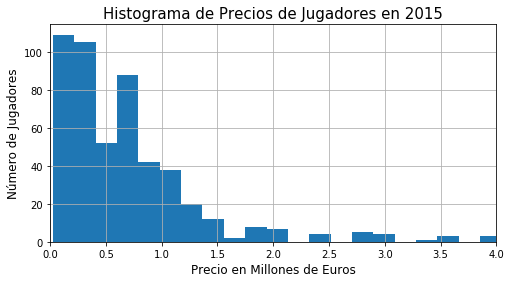

El valor promedio de un jugador en temporada 2015 es 0.75 millones de euros


In [38]:
plt.figure(figsize = (8,4))
df.value_2015.hist(bins = 120)
plt.title('Histograma de Precios de Jugadores en 2015', fontsize = 15)
plt.xlabel('Precio en Millones de Euros', fontsize = 12)
plt.ylabel('Número de Jugadores', fontsize = 12);
plt.xlim(0, df.value_2015.quantile(0.99));
plt.show()
print('El valor promedio de un jugador en temporada 2015 es %1.2f' %df.value_2015.mean() + ' millones de euros')

In [39]:
df.value_2015.describe()

count    507.000000
mean       0.752367
std        1.221002
min        0.025000
25%        0.262500
50%        0.500000
75%        0.850000
max       23.000000
Name: value_2015, dtype: float64

Dado que tenemos jugadores muy caros en el dataframe, el valor promedio de los jugadores es de 0.76 millones a pesar de que el 75% de los valores de los jugadores es menor a 0.8 millones de euros. En este caso no combiene rellenar los valores nulos con el valor promedio, pero ¿con qué se podrían rellenar?
Dado que los jugadores sin valor en 2015 deben ser principiantes o poco destacados, nos combiene rellenar estos valores con un valor pequeño.

In [40]:
print('La moda es: %1.1f' %df.value_2015.mode()[0] + ' millones de euros')

La moda es: 0.4 millones de euros


Este valor resulta más adecuado que el promedio, pero quizás sigue siendo demasiado para los jugadores a los que vamos a asignarle este precio. Tomando en cuenta que estos jugadores deben ser de los más baratos, consideremos el cuantil del 5% y asignemos este número para rellenar los no-nulos:

In [177]:
print('El cuantil del 5 por ciento es: %1.2f' %df.value_2015.quantile(0.05) + ' millones de euros')

El cuantil del 5 por ciento es: 0.05 millones de euros


In [178]:
df['value_2015'] = df.value_2015.fillna(df.value_2015.quantile(0.05))

Procediendo de la misma manera para los valores nulos de value_2016:

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 480
Data columns (total 18 columns):
Jugador                     404 non-null object
Nacionalidad                404 non-null object
posicion_1                  404 non-null object
posicion_2                  404 non-null object
posicion_3                  404 non-null object
minutos_jugados_pos1        404 non-null float64
minutos_jugados_pos2        404 non-null float64
minutos_jugados_pos3        404 non-null float64
ranking_pos1                404 non-null float64
ranking_pos2                404 non-null float64
ranking_pos3                404 non-null float64
ranking_restringido_pos1    404 non-null float64
ranking_restringido_pos2    404 non-null float64
ranking_restringido_pos3    404 non-null float64
equipo_x                    404 non-null object
value_2015                  404 non-null float64
value_2016                  395 non-null float64
edad                        404 non-null float64
dtypes: float64(12)

Dado que sólo son 9 valores nulos, una primera opción sería sólo eliminar estos renglones y trabajar con los datos restantes. No obstante, repitamos el análisis de antes:

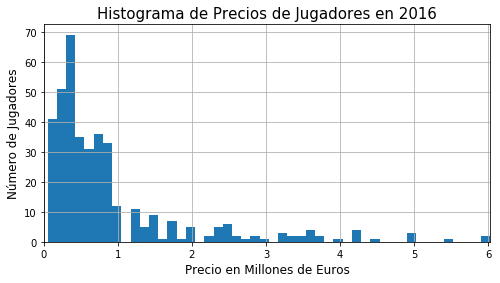

El valor promedio de un jugador en temporada 2016 es 0.99 millones de euros


In [180]:
plt.figure(figsize = (8,4))
df.value_2016.hist(bins = 120)
plt.title('Histograma de Precios de Jugadores en 2016', fontsize = 15)
plt.xlabel('Precio en Millones de Euros', fontsize = 12)
plt.ylabel('Número de Jugadores', fontsize = 12);
plt.xlim(0, df.value_2016.quantile(0.99));
plt.show()
print('El valor promedio de un jugador en temporada 2016 es %1.2f' %df.value_2016.mean() + ' millones de euros')


Pensando de nuevo que estos valores nulos corresponden a jugadores de bajo nivel:

In [181]:
df.value_2016.describe()

count    395.000000
mean       0.989114
std        1.388926
min        0.050000
25%        0.300000
50%        0.600000
75%        0.950000
max       15.000000
Name: value_2016, dtype: float64

De nuevo el promedio es demasiado para la clase de jugadores a los que estamos intentando asignarles un precio. Volvamos a usar el cuantil del 5%:

In [182]:
df.value_2016.quantile(0.05)

0.1

In [183]:
df['value_2016'] = df.value_2016.fillna(df.value_2016.quantile(0.05))

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 480
Data columns (total 18 columns):
Jugador                     404 non-null object
Nacionalidad                404 non-null object
posicion_1                  404 non-null object
posicion_2                  404 non-null object
posicion_3                  404 non-null object
minutos_jugados_pos1        404 non-null float64
minutos_jugados_pos2        404 non-null float64
minutos_jugados_pos3        404 non-null float64
ranking_pos1                404 non-null float64
ranking_pos2                404 non-null float64
ranking_pos3                404 non-null float64
ranking_restringido_pos1    404 non-null float64
ranking_restringido_pos2    404 non-null float64
ranking_restringido_pos3    404 non-null float64
equipo_x                    404 non-null object
value_2015                  404 non-null float64
value_2016                  404 non-null float64
edad                        404 non-null float64
dtypes: float64(12)

Con lo que hemos terminado el tratamiento.

## Creación de Variables

Notamos que los valores de minutos jugados en posición 1 y 2 se repiten en demasiadas ocasiones. Esto es información redundante y no debe usarse para la nueva variable minutos totales jugados.

Filtramos las columnas en las que los minutos jugados en posición 1 y posición 2 son diferentes y además los minutos jugados en posición 2 son distintos de cero:  

In [189]:
df[(df.minutos_jugados_pos1 != df.minutos_jugados_pos2) & (df.minutos_jugados_pos2 != 0)]

,Jugador,Nacionalidad,posicion_1,posicion_2,posicion_3,minutos_jugados_pos1,minutos_jugados_pos2,minutos_jugados_pos3,ranking_pos1,ranking_pos2,ranking_pos3,ranking_restringido_pos1,ranking_restringido_pos2,ranking_restringido_pos3,equipo_x,value_2015,value_2016,edad
142,"Cufre, Brian Ezequiel",Argentina,Lateral por izquierda,Defensa central,No aplica,270.0,1689.0,0.0,3.060667,4.114000,0.000000,0.000000,4.114000,0.000000,Club Atlético Vélez Sarsfield,0.05,0.15,19.1
325,"Papa, Emiliano",Argentina,Volante por izquierda,Lateral por izquierda,Volante Mixto,252.0,994.0,994.0,4.387206,5.772133,6.071831,0.000000,5.772133,6.071831,Club Atlético Independiente,1.20,0.50,33.8
327,"Papa, Emiliano",Argentina,Volante por izquierda,Lateral por izquierda,Volante Mixto,252.0,994.0,994.0,4.387206,5.772133,6.071831,0.000000,5.772133,6.071831,Club Atlético Tigre,1.20,0.50,33.8
395,"Rosales, Santiago",Argentina,Volante por izquierda,Volante por derecha,Volante Mixto,498.0,573.0,573.0,4.066265,4.112042,4.303665,0.000000,0.000000,0.000000,Club Atlético Aldosivi,0.05,0.50,20.8
418,"Silva, Alejandro",Uruguaya,Volante por derecha,Lateral por derecha,No aplica,318.0,1650.0,0.0,4.866792,5.275636,0.000000,0.000000,5.275636,0.000000,Club Atlético Lanús,0.90,0.90,26.4
421,"Solari, Augusto",Argentina,Volante por derecha,Lateral por derecha,No aplica,979.0,1776.0,0.0,5.645822,3.783193,0.000000,5.645822,3.783193,0.000000,Club Atlético River Plate,0.50,1.25,24.0
424,"Solari, Augusto",Argentina,Volante por derecha,Lateral por derecha,No aplica,979.0,1776.0,0.0,5.645822,3.783193,0.000000,5.645822,3.783193,0.000000,Club Estudiantes de La Plata,0.50,1.25,24.0
447,"Valdez Chamorro, Jorge Vidal",Argentina,Volante por derecha,Volante Mixto,Volante ofensivo,143.0,673.0,673.0,2.954895,4.740713,3.650817,0.000000,4.740713,3.650817,Club Atlético Lanús,0.50,0.50,21.7
449,"Valdez Chamorro, Jorge Vidal",Argentina,Volante por derecha,Volante Mixto,Volante ofensivo,143.0,673.0,673.0,2.954895,4.740713,3.650817,0.000000,4.740713,3.650817,Club de Gimnasia y Esgrima La Plata,0.50,0.50,21.7
479,"Zuqui, Fernando",Argentina,Volante por derecha,Volante defensivo,Volante Mixto,432.0,2466.0,2466.0,5.671875,6.151460,5.577372,0.000000,6.151460,5.577372,Club Atlético Boca Juniors,0.50,1.75,24.2


In [190]:
len(df[(df.minutos_jugados_pos1 != df.minutos_jugados_pos2) & (df.minutos_jugados_pos2 != 0)])

11

Sólo tenemos 11 jugadores con minutos jugados diferentes en dos posiciones diferentes.
Ahora veamos cuantos tenemos con minutos diferentes en la posición dos y tres:

In [191]:
df[(df.minutos_jugados_pos3 != 0) & (df.minutos_jugados_pos3 != df.minutos_jugados_pos2)]

,Jugador,Nacionalidad,posicion_1,posicion_2,posicion_3,minutos_jugados_pos1,minutos_jugados_pos2,minutos_jugados_pos3,ranking_pos1,ranking_pos2,ranking_pos3,ranking_restringido_pos1,ranking_restringido_pos2,ranking_restringido_pos3,equipo_x,value_2015,value_2016,edad
386,"Rodriguez, Thomas",Argentina,Volante por derecha,Volante defensivo,Volante Mixto,14.0,14.0,197.0,3.857143,2.957143,5.050508,0.000000,0.000000,0.00000,Club Atlético Banfield,0.05,0.1,19.8
389,"Romero Gamarra, Alejandro",Argentina,Volante por izquierda,Volante por derecha,Volante Mixto,714.0,714.0,1887.0,5.142857,5.316807,4.973370,5.142857,5.316807,4.97337,Club Atlético Huracán,0.05,0.2,21.0


Sólo tenemos dos jugadores con posición 2 y 3 distintas de cero y con valores distintos. Y encima, estos dos jugadores tienen repetidos sus minutos en la posición 1 y 2. 

Bastará con escribir una función que compare los minutos jugados en 1 con 2, si son iguales que sólo considere una para la suma, si son diferentes que compare los minutos en 2 y 3.   

In [221]:
if df.minutos_jugados_pos1 == df.minutos_jugados_pos2:
    print('gatus')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [201]:
if (df.minutos_jugados_pos1 == df.minutos_jugados_pos2) & (df.minutos_jugados_pos3 != 0):
    print('gatus')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [127]:
df['total_minutos_jugados'] = (df.minutos_jugados_pos1)+(df.minutos_jugados_pos2)+(df.minutos_jugados_pos3)

0       True
2       True
3       True
4       True
5      False
6       True
7      False
9       True
10      True
11      True
12     False
13      True
14      True
15     False
16      True
17     False
18     False
19      True
20      True
21      True
23      True
24     False
25     False
26     False
28     False
29      True
30      True
31      True
32      True
33      True
       ...  
445    False
446    False
447    False
449    False
451     True
452     True
453    False
455     True
456     True
457     True
458    False
459     True
460     True
462     True
463     True
464     True
465    False
466     True
467    False
468    False
469     True
471     True
472     True
473    False
475     True
476    False
477    False
478    False
479    False
480    False
Length: 404, dtype: bool

In [137]:
df

,Jugador,Nacionalidad,posicion_1,posicion_2,posicion_3,minutos_jugados_pos1,minutos_jugados_pos2,minutos_jugados_pos3,ranking_pos1,ranking_pos2,ranking_pos3,ranking_restringido_pos1,ranking_restringido_pos2,ranking_restringido_pos3,equipo_x,value_2015,value_2016,edad
0,"Acevedo, Nelson",Argentina,Volante defensivo,Volante Mixto,No aplica,699.0,699.0,0.0,8.114807,6.786695,0.0,8.114807,6.786695,0.0,Club Atlético Unión (Santa Fe),0.075,0.225,27.5
2,"Acosta, Lautaro",Argentina,Volante por izquierda,Volante Mixto,No aplica,1842.0,1842.0,0.0,3.784080,3.557492,0.0,3.784080,3.557492,0.0,Club Atlético Lanús,1.800,2.000,27.9
3,"Acuna, Marcos",Argentina,Volante por derecha,Volante Mixto,No aplica,1557.0,1557.0,0.0,4.772254,5.514451,0.0,4.772254,5.514451,0.0,Racing Club,0.050,2.000,24.2
4,"Aguero, Emiliano German",Argentina,Volante defensivo,Volante Mixto,No aplica,791.0,791.0,0.0,7.301833,6.352339,0.0,7.301833,6.352339,0.0,Club Atlético San Martín (SJ),0.050,0.400,21.0
5,"Aguilar, Pablo Andres",Argentina,Lateral por derecha,No aplica,No aplica,1817.0,0.0,0.0,3.125531,0.000000,0.0,3.125531,0.000000,0.0,Club Atlético San Martín (SJ),0.350,0.350,31.4
